<a href="https://colab.research.google.com/github/MMRNGKS/Numerical-Methods-Analysis-Problem-Solving-with-Python-Code-Solutions/blob/main/Polynomial_Interpolation_And_Curve_Fitting_Problem_With_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math
from math import e

#1. Kinematic viscosity µk of water varies with temperature T as shown in the table. Determine the cubic that best fits the data, and use it to compute µk at T = 10◦, 30◦, 60◦, and 90◦C.

#T (◦C): 0, 21.1, 37.8, 54.4, 71.1, 87.8, 100
#µk (10^−3 m^2/s): 1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296

poly_coeffs:  [-8.45886166e-07  3.28569164e-04 -3.93212797e-02  1.79570895e+00]
T = 10;  µk(T) =  1.4749813318705263
T = 30;  µk(T) =  0.8701478844582461
T = 60;  µk(T) =  0.45408107031955064
T = 90;  µk(T) =  0.31945286124506


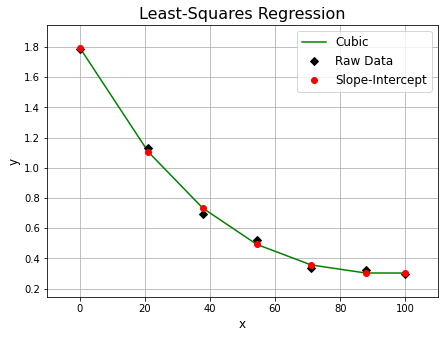

In [ ]:
# Fit a polynomial of degree 3
x = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
y = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])
degree = 3

# Cubic
poly_coeffs=np.polyfit(x, y, degree)
p3 = np.poly1d(poly_coeffs)
print('poly_coeffs: ',poly_coeffs)
f = CubicSpline(x, y, bc_type='natural')

#print(f([10, 30, 60, 90]))
print('T = 10;  µk(T) = ', f(10))
print('T = 30;  µk(T) = ', f(30))
print('T = 60;  µk(T) = ', f(60))
print('T = 90;  µk(T) = ', f(90))

def plot_slope_intercept(x, y, ax):

    ax.plot(x, y, 'ro', label='Slope-Intercept')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True)

def plot_raw_data(x, y, ax):

    ax.plot(x, y, 'kD', label='Raw Data')

# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay slope-intercept
plot_raw_data(x, y, ax1)
plot_slope_intercept(x, p3(x), ax1)


# Add a legend
ax1.legend(loc='best', fontsize=12)

# Add a figure title
ax1.set_title('Least-Squares Regression', fontsize=16)

plt.show()

#2. The table displays thermal efficiencies of some early steam engines. Determine the polynomial that provides the best fit to the data and use it to predict the thermal efficiency in the year 2000.

Year | Efficiency (%) | Type

1718 |      0.5       | Newcomen

1767 |      0.8       | Smeaton

1774 |      1.4       | Smeaton

1775 |      2.7       | Watt

1792 |      4.5       | Watt

1816 |      7.5       | Woolf compound

1828 |      12.0      | Improved Cornish

1834 |      17.0      | Improved Cornish

1878 |      17.2      | Corliss compound

1906 |      23.0      | Triple expansion

In [ ]:
xData = np.array([1718, 1767, 1774, 1775, 1792, 1816, 1828, 1834, 1878, 1906])
yData = np.array([0.5, 0.8, 1.4, 2.7, 4.5, 7.5, 12.0, 17.0, 17.2, 23.0])
i = 0
degree = 1
m = 2
while (i < 4):
  co = np.polyfit(xData, yData, degree)
  p = np.poly1d(co)
  s = yData-p(xData)
  sq = np.sum(pow(s,2))
  print('degree of polynomial = ', degree, '; σ = ', math.sqrt(sq/(10-m)))
  degree+=1
  m+=1
  i+=1

coefficients = np.polyfit(xData, yData, 4);
x = 2000;
estimatedY= np.polyval(coefficients, x);

print('Year 2000 predicted thermal efficiency = ',estimatedY,'%')


degree of polynomial =  1 ; σ =  2.8552022884971504
degree of polynomial =  2 ; σ =  2.76840658050928
degree of polynomial =  3 ; σ =  2.265845111263898
degree of polynomial =  4 ; σ =  2.2340260941174805
Year 2000 predicted thermal efficiency =  111.34991072793491 %


# 3. The intensity of radiation of a radioactive substance was measured at half-year intervals. The results were:

t(years): 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5

γ: 1.000, 0.994, 0.990, 0.985, 0.979, 0.977, 0.972, 0.969, 0.967, 0.960, 0.956, 0.952

In [ ]:
xD = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
yD = np.array([1.000, 0.994, 0.990, 0.985, 0.979, 0.977, 0.972, 0.969, 0.967, 0.960, 0.956, 0.952])
Ly = np.log(yD)

polyn_coeffs=np.polyfit(xD, Ly, 1)
a = pow(e, polyn_coeffs[1])
b = -1*polyn_coeffs[0]
T = np.log(2)/b

print('ˆb and ˆa =', polyn_coeffs)
print('Coefficients = [', a, b, ']')
print('Model estimate: γ(t) = ', a, 'e^', polyn_coeffs[0], 't')
print('T_(1/2) = ', T)

ˆb and ˆa = [-0.00863955 -0.00158547]
Coefficients = [ 0.9984157812833949 0.008639549701453633 ]
Model estimate: γ(t) =  0.9984157812833949 e^ -0.008639549701453633 t
T_(1/2) =  80.22954951498467


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

xD = np.array([-320, -240, -160, -80, 0, 80])
yD = np.array([2.76, 3.83, 4.72, 5.43, 6.00, 6.47])
degree = 2

poly_coeffs=np.polyfit(xD, yD, degree)
p2 = np.poly1d(poly_coeffs)

print('Polynomial regression mode:')
print(p2)
x = sy.Symbol("x")
print('The reduction in the length of the cylinder in inches is', -0.000012*sy.integrate(p2(x), (x, 80, -315)))

Polynomial regression mode:
            2
-1.194e-05 x + 0.006338 x + 6.024
The reduction in the length of the cylinder in inches is 0.0235052517745535
